In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import healpy as hp

import lsst.sims.maf.db as db
import lsst.sims.maf.utils as utils
import lsst.sims.maf.metrics as metrics
import lsst.sims.maf.slicers as slicers
import lsst.sims.maf.stackers as stackers
import lsst.sims.maf.metricBundles as metricBundles

In [2]:
dbFile = 'baseline_nexp1_v1.6_10yrs.db'
conn = db.OpsimDatabase(dbFile)
outDir='temp'
resultsDb = db.ResultsDb(outDir=outDir)

In [9]:
class NightGaps(metrics.BaseMetric):
    def __init__(self, nightCol='night', min_gap=5, max_gap=40, **kwargs):
        self.nightCol = nightCol
        self.min_gap=min_gap
        self.max_gap=max_gap
        super(NightGaps, self).__init__(col=[nightCol], units='Fraction', **kwargs)
    def run(self, dataSlice, slicePoint=None):
        unights = np.unique(dataSlice[self.nightCol])
        di = np.diff(unights)
        bad_gaps = np.where((di > self.min_gap) & (di < self.max_gap))[0]
        return bad_gaps.size/unights.size
        

/Users/yoachim/git_repos/sims_maf/python/lsst/sims/maf/metrics/baseMetric.py:39: UserWarning: Redefining metric __main__.NightGaps! (there are >1 metrics with the same name)
  warnings.warn('Redefining metric %s! (there are >1 metrics with the same name)' % (metricname))


In [10]:
bundleList = []
sql = ''
metric = NightGaps()
slicer = slicers.HealpixSlicer()
summaryStats = [metrics.MeanMetric()]
plotDict = {}
bundleList.append(metricBundles.MetricBundle(metric,slicer,sql, plotDict=plotDict, summaryMetrics=summaryStats))

Healpix slicer using NSIDE=128, approximate resolution 27.483891 arcminutes


Querying database SummaryAllProps with no constraint for columns ['fieldRA', 'night', 'fieldDec'].
Found 2232205 visits
Running:  ['opsim_NightGaps_night_HEAL']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Plotting figures with "" constraint now.
monopole: 0.371647  dipole: lon: -47.3141, lat: 70.5991, amp: 0.0902399
Plotting complete.


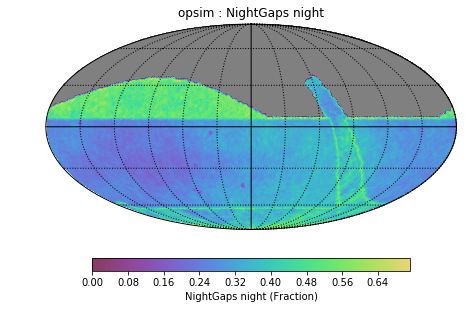

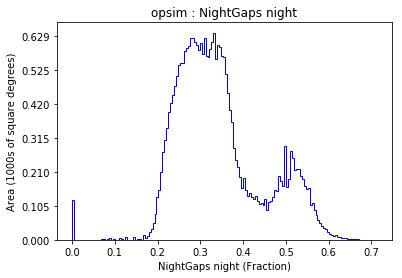

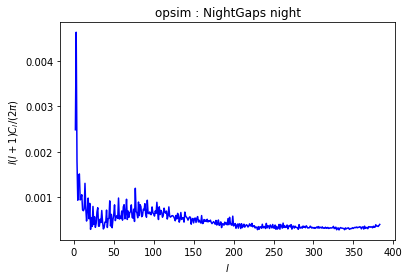

In [11]:
bd = metricBundles.makeBundlesDictFromList(bundleList)
bg = metricBundles.MetricBundleGroup(bd, conn, outDir=outDir, resultsDb=resultsDb)
bg.runAll()
bg.plotAll(closefigs=False)